<a href="https://colab.research.google.com/github/nattntn/DPDM2024/blob/main/Exam_2_dpdm_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ข้อสอบกลางภาค ข้อที่ 2

นางสาวณัฐนิช หิรัญชวโรจน์ 675020011-0

ให้แสดงวิธีการจัดการข้อมูลและนำเสนอจุดที่น่าสนใจในข้อมูลนี้มา 2 จุด

In [1]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/Exam_last/Data_Docter_ศ.นพ.ชวลิต.csv')
df

,name,comments,ยอดไลค์,จำนวนการตอบกลับ
0,ศ.นพ.ชวลิต ศูนย์มะเร็ง รพ.จุฬาลงกรณ์,กดที่ลิงค์นี้เพื่อเข้าไปอ่านคอมเม้นของโพสต์ครั...,456,3
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5
...,...,...,...,...
1648,Fear Q'bick,Jitladda Thonglukkeaw มาแชเร้ว ได้บุนนะ,0,0
1649,Toei Nittiya,Kamta Auttakan,0,0
1650,Ouiaii Promsuan,อนุชา มีลาภ,0,0
1651,Thanyalak Banboo,Na Nat Fari Kawa II Herbara Binti Abdullah Ras...,0,0


In [4]:
df.isnull().any()

,0
name,False
comments,False
ยอดไลค์,False
จำนวนการตอบกลับ,False


In [6]:
!pip install pythainlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 35.5 MB/s eta 0:00:00


In [7]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [8]:
# !pip install -U --pre matplotlib
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [9]:
import pandas as pd
from pythainlp.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import requests
from io import BytesIO
from pathlib import Path
from pythainlp.corpus import thai_stopwords

# clean comment --> ลบ ภาษาอังกฤษออก

re เป็นไลบรารีใน Python ที่ใช้สำหรับการทำงานกับ Regular Expressions (นิพจน์ทั่วไป) ซึ่งเป็นลำดับของอักขระที่กำหนดรูปแบบการค้นหา

โดยทั่วไปแล้วจะใช้ re เพื่อ:

ค้นหาข้อความ: คุณสามารถใช้ re เพื่อค้นหาข้อความที่ตรงกับรูปแบบที่กำหนด
แทนที่ข้อความ: re ช่วยให้คุณสามารถแทนที่ข้อความที่ตรงกับรูปแบบที่กำหนดด้วยข้อความอื่น
ตรวจสอบความถูกต้องของข้อมูล: คุณสามารถใช้ re เพื่อตรวจสอบว่าข้อมูลที่ป้อนตรงกับรูปแบบที่ต้องการหรือไม่ เช่น รูปแบบของอีเมลหรือหมายเลขโทรศัพท์

In [10]:
# prompt: ตัดค่าใน comment และลบคำที่เป็นภาษาอังกฤษ

import re

# ตัดคำในคอลัมน์ 'comments' และลบคำที่เป็นภาษาอังกฤษ
df['tokenized_comments'] = df['comments'].apply(lambda x: [word for word in word_tokenize(x, engine='newmm') if not re.match(r'[a-zA-Z]+', word)])

# นับความถี่ของคำหลังจากลบคำภาษาอังกฤษ
all_words_noeng = [word for comment in df['tokenized_comments'] for word in comment]
word_freq_noeng = Counter(all_words_noeng)

# แสดงคำที่พบบ่อยที่สุด 10 อันดับหลังจากลบคำภาษาอังกฤษ
print(word_freq_noeng.most_common(10))

[(' ', 7976), ('เป็น', 971), ('มะเร็ง', 786), ('ไม่', 749), ('ที่', 630), ('มี', 573), ('ค่ะ', 515), ('ตรวจ', 483), ('ไป', 482), ('อาการ', 421)]


In [11]:
df

,name,comments,ยอดไลค์,จำนวนการตอบกลับ,tokenized_comments
0,ศ.นพ.ชวลิต ศูนย์มะเร็ง รพ.จุฬาลงกรณ์,กดที่ลิงค์นี้เพื่อเข้าไปอ่านคอมเม้นของโพสต์ครั...,456,3,"[กด, ที่, ลิงค์, นี้, เพื่อ, เข้าไป, อ่าน, คอม..."
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70,"[เป็น, มะเร็ง, ลำไส้ใหญ่, , ระยะ, ที่, , 3, ..."
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11,"[แม่, เป็น, มะเร็ง, ขั้ว, ปอด, , ลาม, ขึ้นสมอ..."
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44,"[#, มะเร็ง, ปาก, มดลูก, ระยะ, , เกือบ, เข้า, ..."
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5,"[ลูกสาว, เป็น, มะเร็ง, กระดูก, , ช่วง, เข่า, ..."
...,...,...,...,...,...
1648,Fear Q'bick,Jitladda Thonglukkeaw มาแชเร้ว ได้บุนนะ,0,0,"[ , , มา, แช, เร้ว, , ได้, บุ, น, นะ]"
1649,Toei Nittiya,Kamta Auttakan,0,0,[ ]
1650,Ouiaii Promsuan,อนุชา มีลาภ,0,0,"[อนุชา, , มี, ลาภ]"
1651,Thanyalak Banboo,Na Nat Fari Kawa II Herbara Binti Abdullah Ras...,0,0,"[ , , , , , , , , , , 'min, ]"


plot ดูว่าคำส่วนใหญ่มีอะไรบ้าง --> มีช่องว่าง และคำอื่นๆ ที่ไม่จำเป็น

[(' ', 7976), ('เป็น', 971), ('มะเร็ง', 786), ('ไม่', 749), ('ที่', 630), ('มี', 573), ('ค่ะ', 515), ('ตรวจ', 483), ('ไป', 482), ('อาการ', 421)]


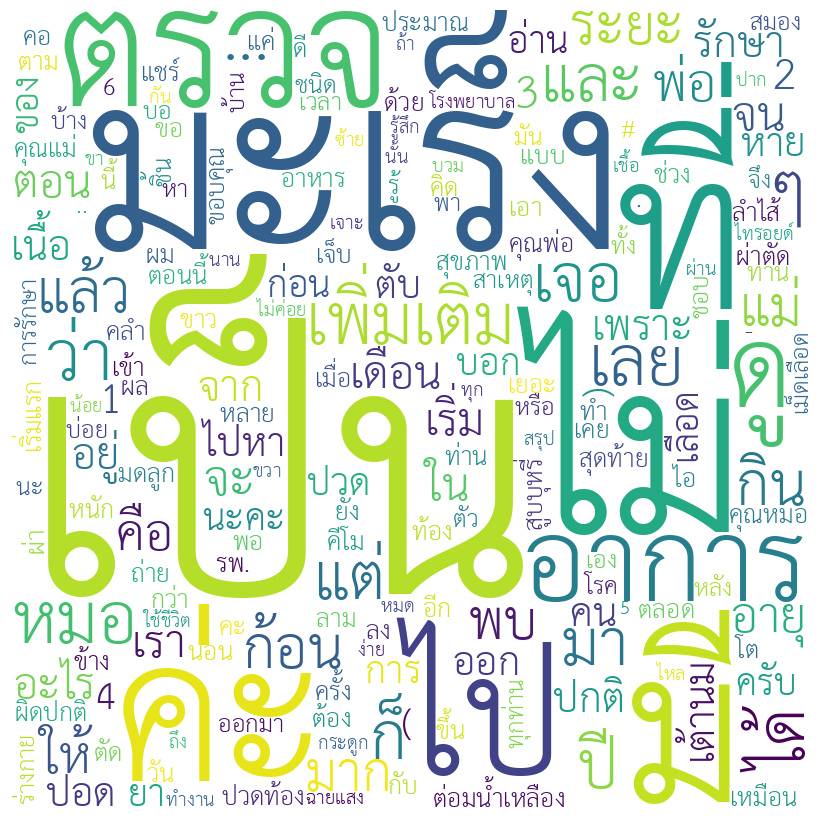

In [12]:
import requests
from io import BytesIO
from pathlib import Path

# ดาวน์โหลดฟอนต์จาก URL
font_url = 'https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf'
response = requests.get(font_url)
font_path = Path("THSarabunNew.ttf")

# บันทึกฟอนต์ในระบบ
with open(font_path, "wb") as f:
    f.write(response.content)

# # ตัดคำในคอลัมน์ 'comments'
# df['tokenized_comments'] = df['comments'].apply(lambda x: word_tokenize(x, engine='newmm')) #ใช้ engine แบบ newmm ซึ่งเป็นหนึ่งในหลายๆ อัลกอริธึมสำหรับการตัดคำในภาษาไทยของ pythainlp.

# นับความถี่ของคำ
all_words = [word for comment in df['tokenized_comments'] for word in comment]
word_freq = Counter(all_words)

# แสดงคำที่พบบ่อยที่สุด 10 อันดับ
print(word_freq.most_common(10))

# สร้าง Word Cloud
wordcloud = WordCloud(font_path=str(font_path), width=800, height=800, background_color='white').generate_from_frequencies(word_freq)

# แสดงผล Word Cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [13]:
df

,name,comments,ยอดไลค์,จำนวนการตอบกลับ,tokenized_comments
0,ศ.นพ.ชวลิต ศูนย์มะเร็ง รพ.จุฬาลงกรณ์,กดที่ลิงค์นี้เพื่อเข้าไปอ่านคอมเม้นของโพสต์ครั...,456,3,"[กด, ที่, ลิงค์, นี้, เพื่อ, เข้าไป, อ่าน, คอม..."
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70,"[เป็น, มะเร็ง, ลำไส้ใหญ่, , ระยะ, ที่, , 3, ..."
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11,"[แม่, เป็น, มะเร็ง, ขั้ว, ปอด, , ลาม, ขึ้นสมอ..."
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44,"[#, มะเร็ง, ปาก, มดลูก, ระยะ, , เกือบ, เข้า, ..."
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5,"[ลูกสาว, เป็น, มะเร็ง, กระดูก, , ช่วง, เข่า, ..."
...,...,...,...,...,...
1648,Fear Q'bick,Jitladda Thonglukkeaw มาแชเร้ว ได้บุนนะ,0,0,"[ , , มา, แช, เร้ว, , ได้, บุ, น, นะ]"
1649,Toei Nittiya,Kamta Auttakan,0,0,[ ]
1650,Ouiaii Promsuan,อนุชา มีลาภ,0,0,"[อนุชา, , มี, ลาภ]"
1651,Thanyalak Banboo,Na Nat Fari Kawa II Herbara Binti Abdullah Ras...,0,0,"[ , , , , , , , , , , 'min, ]"


In [ ]:
# df['tokenized_comments'].tolist() # มีภาษาอังกฤษที่เป็นชื่อ fb +stob word

# clean ด้วยการลบ stop word thai eng

In [36]:
# thai_stopwords()

In [16]:
eng_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[(' ', 7976), ('มะเร็ง', 786), ('ตรวจ', 483), ('อาการ', 421), ('ดู', 407), ('หมอ', 368), ('เจอ', 308), ('ปี', 308), ('...', 305), ('  ', 296)]


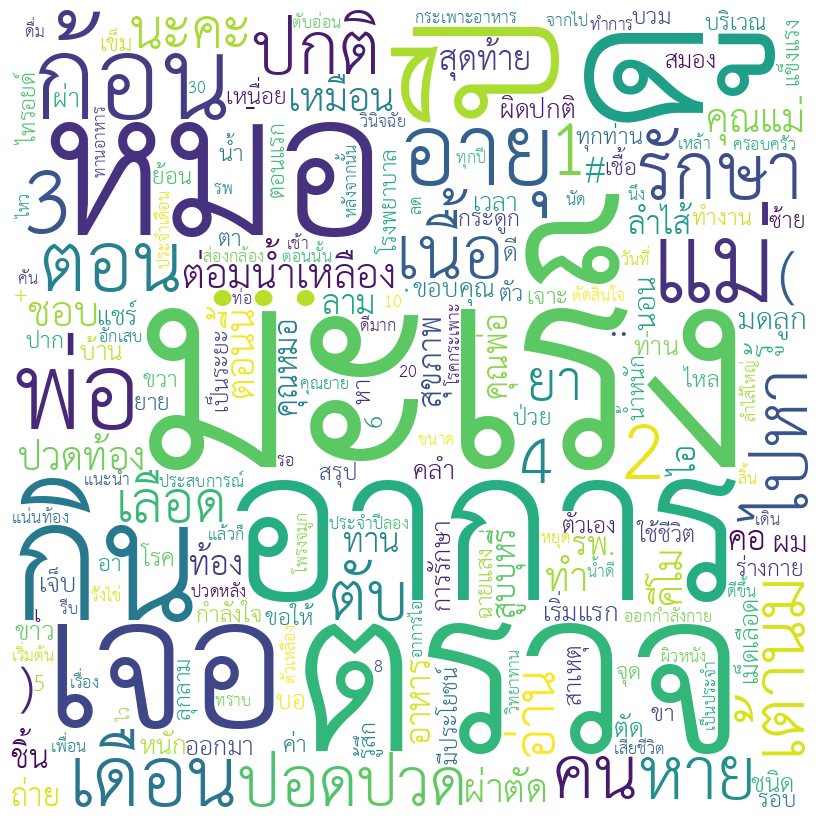

In [14]:
stopwords = list(thai_stopwords())

# เพิ่ม stop words ของคุณเอง
# custom_stopwords = ["ครับ", "ค่ะ", "ๆ", "ได้", "เลย", "มาก", "สุด", "ดี", "ที่สุด"]
# stopwords.extend(custom_stopwords)

# เพิ่ม stop words ภาษาอังกฤษ
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as en_stopwords
eng_stopwords = en_stopwords.words('english')
stopwords.extend(eng_stopwords)

# ลบ stop words ออกจาก tokenized_comments
df['cleaned_comments'] = df['tokenized_comments'].apply(lambda tokens: [word for word in tokens if word not in stopwords])

# นับความถี่ของคำหลังจากลบ stop words
all_words_nostop = [word for comment in df['cleaned_comments'] for word in comment]
word_freq_nostop = Counter(all_words_nostop)

# แสดงคำที่พบบ่อยที่สุด 10 อันดับหลังจากลบ stop words
print(word_freq_nostop.most_common(10))

# สร้าง Word Cloud ใหม่โดยไม่ใช้ stop words
wordcloud_nostop = WordCloud(font_path=str(font_path), width=800, height=800, background_color='white').generate_from_frequencies(word_freq_nostop)

# แสดงผล Word Cloud ใหม่
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_nostop, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [17]:
df

,name,comments,ยอดไลค์,จำนวนการตอบกลับ,tokenized_comments,cleaned_comments
0,ศ.นพ.ชวลิต ศูนย์มะเร็ง รพ.จุฬาลงกรณ์,กดที่ลิงค์นี้เพื่อเข้าไปอ่านคอมเม้นของโพสต์ครั...,456,3,"[กด, ที่, ลิงค์, นี้, เพื่อ, เข้าไป, อ่าน, คอม...","[กด, ลิงค์, เข้าไป, อ่าน, คอม, เม้น, โพสต์, :/..."
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70,"[เป็น, มะเร็ง, ลำไส้ใหญ่, , ระยะ, ที่, , 3, ...","[มะเร็ง, ลำไส้ใหญ่, , , 3, , ตอน, อายุ, , ..."
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11,"[แม่, เป็น, มะเร็ง, ขั้ว, ปอด, , ลาม, ขึ้นสมอ...","[แม่, มะเร็ง, ขั้ว, ปอด, , ลาม, ขึ้นสมอง, , ..."
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44,"[#, มะเร็ง, ปาก, มดลูก, ระยะ, , เกือบ, เข้า, ...","[#, มะเร็ง, ปาก, มดลูก, , , 1, , ตอน, อายุ,..."
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5,"[ลูกสาว, เป็น, มะเร็ง, กระดูก, , ช่วง, เข่า, ...","[ลูกสาว, มะเร็ง, กระดูก, , เข่า, , อาการ, เร..."
...,...,...,...,...,...,...
1648,Fear Q'bick,Jitladda Thonglukkeaw มาแชเร้ว ได้บุนนะ,0,0,"[ , , มา, แช, เร้ว, , ได้, บุ, น, นะ]","[ , , แช, เร้ว, , บุ, น]"
1649,Toei Nittiya,Kamta Auttakan,0,0,[ ],[ ]
1650,Ouiaii Promsuan,อนุชา มีลาภ,0,0,"[อนุชา, , มี, ลาภ]","[อนุชา, , ลาภ]"
1651,Thanyalak Banboo,Na Nat Fari Kawa II Herbara Binti Abdullah Ras...,0,0,"[ , , , , , , , , , , 'min, ]","[ , , , , , , , , , , 'min, ]"


In [19]:
word_freq_nostop.most_common(20)

[(' ', 7976),
 ('มะเร็ง', 786),
 ('ตรวจ', 483),
 ('อาการ', 421),
 ('ดู', 407),
 ('หมอ', 368),
 ('เจอ', 308),
 ('ปี', 308),
 ('...', 305),
 ('  ', 296),
 ('กิน', 254),
 ('ก้อน', 238),
 ('แม่', 220),
 ('พ่อ', 197),
 ('อายุ', 170),
 ('3', 143),
 ('เดือน', 143),
 ('ตอน', 139),
 ('2', 129),
 ('รักษา', 126)]

[('มะเร็ง', 786), ('ก้อน', 238), ('แม่', 220), ('พ่อ', 197), ('อายุ', 170), ('3', 143), ('2', 129), ('1', 118), ('เนื้อ', 113), ('ปกติ', 112)]


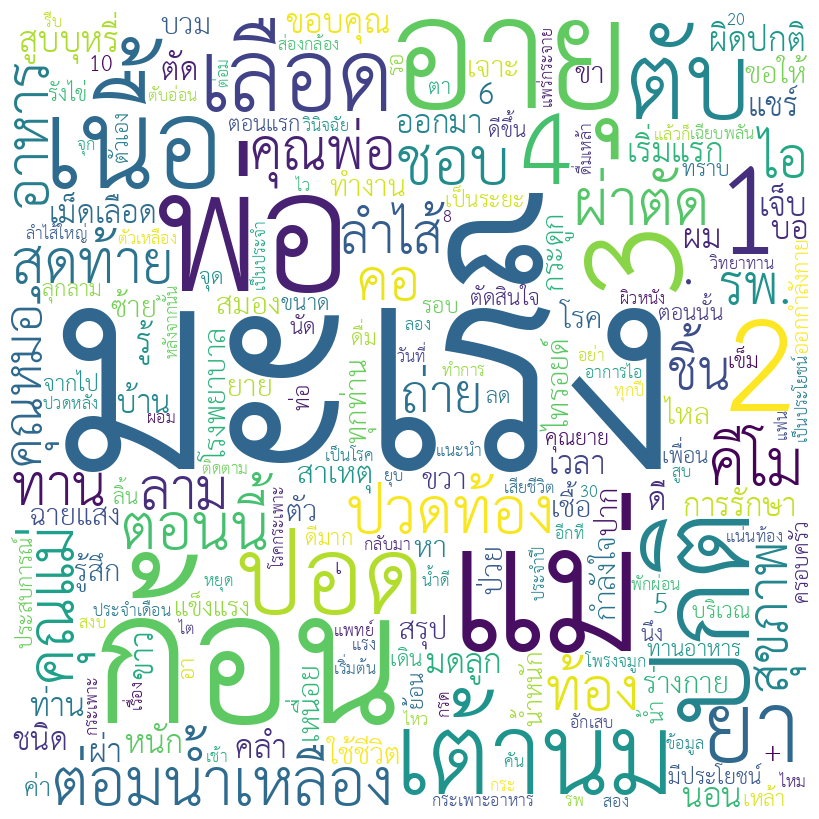

In [18]:
# prompt: stop word eng + thai

import matplotlib.pyplot as plt
# เพิ่มเติม stop words ภาษาอังกฤษและภาษาไทย
stop_words_thai = ["ดู", "ค่ะ", "นะคะ", "นะค่ะ", "คือ", "อ่ะ", "เอ่อ", "เจอ", " กิน", "ไปหา", "อ่าน" , "ตรวจ", "อาการ" , "หมอ" , "ปี" , "กิน", "เดือน", "รักษา", "ตอน", "หาย","คน","ปวด","เหมือน","ทำ"]
stop_words_eng = [" ", "...", "  ", "#", "(",'..','-',')']

# รวม stop words ทั้งหมด
all_stop_words = stop_words_thai + stop_words_eng

# ลบ stop words ออกจาก tokenized_comments
df['cleaned_comments'] = df['cleaned_comments'].apply(lambda x: [word for word in x if word not in all_stop_words])

# นับความถี่ของคำหลังจากลบ stop words
all_words_cleaned = [word for comment in df['cleaned_comments'] for word in comment]
word_freq_cleaned = Counter(all_words_cleaned)

# แสดงคำที่พบบ่อยที่สุด 10 อันดับหลังจากลบ stop words
print(word_freq_cleaned.most_common(10))

# สร้าง Word Cloud ใหม่
wordcloud_cleaned = WordCloud(font_path=str(font_path), width=800, height=800, background_color='white').generate_from_frequencies(word_freq_cleaned)

# แสดงผล Word Cloud ใหม่
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_cleaned, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [20]:
df

,name,comments,ยอดไลค์,จำนวนการตอบกลับ,tokenized_comments,cleaned_comments
0,ศ.นพ.ชวลิต ศูนย์มะเร็ง รพ.จุฬาลงกรณ์,กดที่ลิงค์นี้เพื่อเข้าไปอ่านคอมเม้นของโพสต์ครั...,456,3,"[กด, ที่, ลิงค์, นี้, เพื่อ, เข้าไป, อ่าน, คอม...","[กด, ลิงค์, เข้าไป, คอม, เม้น, โพสต์, ://www.f..."
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70,"[เป็น, มะเร็ง, ลำไส้ใหญ่, , ระยะ, ที่, , 3, ...","[มะเร็ง, ลำไส้ใหญ่, 3, อายุ, 26, พฤติกรรม, มีป..."
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11,"[แม่, เป็น, มะเร็ง, ขั้ว, ปอด, , ลาม, ขึ้นสมอ...","[แม่, มะเร็ง, ขั้ว, ปอด, ลาม, ขึ้นสมอง, เริ่มแ..."
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44,"[#, มะเร็ง, ปาก, มดลูก, ระยะ, , เกือบ, เข้า, ...","[มะเร็ง, ปาก, มดลูก, 1, อายุ, 30, ., ทุกปี, ผิ..."
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5,"[ลูกสาว, เป็น, มะเร็ง, กระดูก, , ช่วง, เข่า, ...","[ลูกสาว, มะเร็ง, กระดูก, เข่า, เริ่มแรก, น้อง,..."
...,...,...,...,...,...,...
1648,Fear Q'bick,Jitladda Thonglukkeaw มาแชเร้ว ได้บุนนะ,0,0,"[ , , มา, แช, เร้ว, , ได้, บุ, น, นะ]","[แช, เร้ว, บุ, น]"
1649,Toei Nittiya,Kamta Auttakan,0,0,[ ],[]
1650,Ouiaii Promsuan,อนุชา มีลาภ,0,0,"[อนุชา, , มี, ลาภ]","[อนุชา, ลาภ]"
1651,Thanyalak Banboo,Na Nat Fari Kawa II Herbara Binti Abdullah Ras...,0,0,"[ , , , , , , , , , , 'min, ]",['min]


# ระยะของมะเร็งที่คนเป็นมากที่สุด

In [21]:
word_freq_cleaned.most_common(40)

[('มะเร็ง', 786),
 ('ก้อน', 238),
 ('แม่', 220),
 ('พ่อ', 197),
 ('อายุ', 170),
 ('3', 143),
 ('2', 129),
 ('1', 118),
 ('เนื้อ', 113),
 ('ปกติ', 112),
 ('เต้านม', 112),
 ('ปอด', 104),
 ('ตับ', 101),
 ('4', 92),
 ('เลือด', 88),
 ('ยา', 84),
 ('ต่อมน้ำเหลือง', 84),
 ('ชอบ', 83),
 ('คุณแม่', 79),
 ('ปวดท้อง', 76),
 ('ผ่าตัด', 75),
 ('คีโม', 75),
 ('ตอนนี้', 74),
 ('สุดท้าย', 74),
 ('อาหาร', 71),
 ('ท้อง', 71),
 ('คุณพ่อ', 69),
 ('คอ', 67),
 ('ทาน', 66),
 ('ลาม', 65),
 ('รพ.', 61),
 ('ไอ', 61),
 ('ลำไส้', 61),
 ('.', 60),
 ('สุขภาพ', 60),
 ('ชิ้น', 59),
 ('ถ่าย', 57),
 ('คุณหมอ', 56),
 ('สูบบุหรี่', 55),
 ('รู้', 53)]

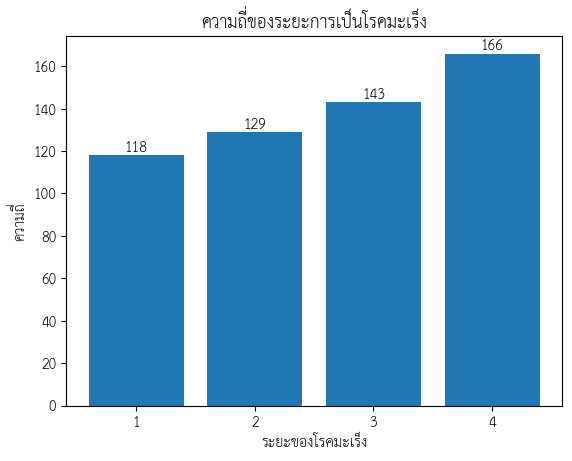

In [22]:
# prompt: อยาก plot ว่า จาก  word_freq_cleaned.most_common(40)  bar ของ '1', '2', '3', '4' เป็นเท่าไหร่  ให้มีเลขความถี่อยู่ข้างบน bar ด้วย

import matplotlib.pyplot as plt
# นับความถี่ของ '1', '2', '3', '4'
counts = {
    '1': word_freq_cleaned['1'],
    '2': word_freq_cleaned['2'],
    '3': word_freq_cleaned['3'],
    '4': word_freq_cleaned['4']+word_freq_cleaned['สุดท้าย']
}

# สร้าง bar chart
plt.bar(counts.keys(), counts.values())
plt.xlabel('ระยะของโรคมะเร็ง')
plt.ylabel('ความถี่')
plt.title('ความถี่ของระยะการเป็นโรคมะเร็ง')

# เพิ่มเลขความถี่ข้างบน bar
for i, v in enumerate(counts.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# อยากรู้ว่าเป็นมะเร็งชนิดไหน

[('มะเร็ง', 786), ('เต้านม', 112), ('ปอด', 104), ('ตับ', 101), ('ต่อมน้ำเหลือง', 84), ('ตอนนี้', 74), ('สุดท้าย', 74), ('อาหาร', 71), ('ท้อง', 71), ('คุณพ่อ', 69)]


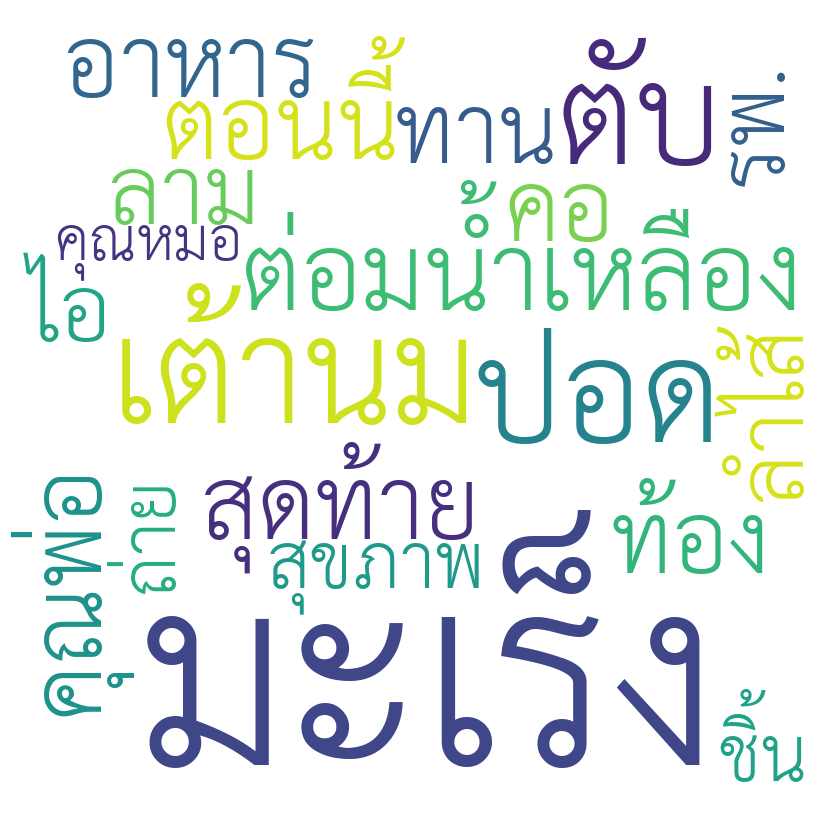

In [23]:
# prompt: stop word eng + thai

import matplotlib.pyplot as plt
# เพิ่มเติม stop words ภาษาอังกฤษและภาษาไทย
stop_words_thai = ["แม่", 'พ่อ', 'อายุ', 'ปกติ', 'ชอบ', 'คุณแม่','ก้อน','เนื้อ','3','2','1','4','ยา','ปวดท้อง','ผ่าตัด','คีโม','เลือด', 'ตอน']
stop_words_eng = ['.']

# รวม stop words ทั้งหมด
all_stop_words = stop_words_thai + stop_words_eng

# ลบ stop words ออกจาก tokenized_comments
df['cancer'] = df['cleaned_comments'].apply(lambda x: [word for word in x if word not in all_stop_words])

# นับความถี่ของคำหลังจากลบ stop words
all_words_cleaned = [word for comment in df['cancer'] for word in comment]
word_freq_cleaned = Counter(all_words_cleaned)

# แสดงคำที่พบบ่อยที่สุด 10 อันดับหลังจากลบ stop words
print(word_freq_cleaned.most_common(10))

# สร้าง Word Cloud ใหม่
top_10_words = dict(word_freq_cleaned.most_common(20))
wordcloud_cleaned = WordCloud(font_path=str(font_path), width=800, height=800, background_color='white').generate_from_frequencies(top_10_words)

# แสดงผล Word Cloud ใหม่
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_cleaned, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [24]:
word_freq_cleaned.most_common(40)

[('มะเร็ง', 786),
 ('เต้านม', 112),
 ('ปอด', 104),
 ('ตับ', 101),
 ('ต่อมน้ำเหลือง', 84),
 ('ตอนนี้', 74),
 ('สุดท้าย', 74),
 ('อาหาร', 71),
 ('ท้อง', 71),
 ('คุณพ่อ', 69),
 ('คอ', 67),
 ('ทาน', 66),
 ('ลาม', 65),
 ('รพ.', 61),
 ('ไอ', 61),
 ('ลำไส้', 61),
 ('สุขภาพ', 60),
 ('ชิ้น', 59),
 ('ถ่าย', 57),
 ('คุณหมอ', 56),
 ('สูบบุหรี่', 55),
 ('รู้', 53),
 ('ผม', 53),
 ('มดลูก', 52),
 ('นอน', 52),
 ('เริ่มแรก', 51),
 ('ผิดปกติ', 51),
 ('ขอบคุณ', 51),
 ('เจ็บ', 51),
 ('ผ่า', 49),
 ('คลำ', 49),
 ('ดี', 48),
 ('ท่าน', 47),
 ('แชร์', 46),
 ('หนัก', 46),
 ('ตัด', 45),
 ('ขาว', 45),
 ('บอ', 43),
 ('เวลา', 43),
 ('ชนิด', 43)]

[('มะเร็ง', 786), ('เต้านม', 112), ('ปอด', 104), ('ตับ', 101), ('ต่อมน้ำเหลือง', 84), ('ลำไส้', 61), ('มดลูก', 52), ('บอ', 43), ('เวลา', 43), ('ชนิด', 43)]


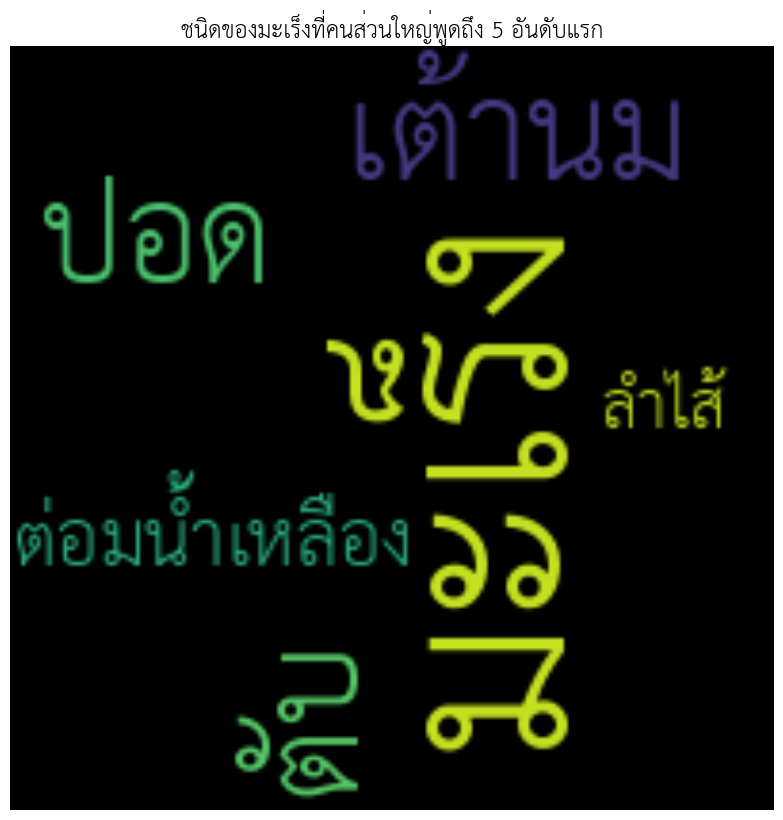

In [25]:
# prompt: stop word eng + thai

import matplotlib.pyplot as plt
# เพิ่มเติม stop words ภาษาอังกฤษและภาษาไทย
stop_words_thai = ['ตอนนี้','สุดท้าย','อาหาร','คุณพ่อ','ท้อง','คอ','ทาน','ลาม','รพ.','ไอ','สุขภาพ','ชิ้น','ถ่าย','คุณหมอ','สูบบุหรี่','รู้','ผม','นอน','เริ่มแรก','ผิดปกติ','ขอบคุณ','เจ็บ','ผ่า','คลำ','ดี','ท่าน','แชร์','หนัก','ตัด','ขาว',]
stop_words_eng = []

# รวม stop words ทั้งหมด
all_stop_words = stop_words_thai + stop_words_eng

# ลบ stop words ออกจาก tokenized_comments
df['cancer'] = df['cancer'].apply(lambda x: [word for word in x if word not in all_stop_words])

# นับความถี่ของคำหลังจากลบ stop words
all_words_cleaned = [word for comment in df['cancer'] for word in comment]
word_freq_cleaned = Counter(all_words_cleaned)

# แสดงคำที่พบบ่อยที่สุด 10 อันดับหลังจากลบ stop words
print(word_freq_cleaned.most_common(10))

# สร้าง Word Cloud ใหม่
# top_6_words = dict(word_freq_cleaned.most_common(6))
# wordcloud_cleaned = WordCloud(font_path=str(font_path), width=400, height=400, background_color='white').generate_from_frequencies(top_6_words)

top_6_words = dict(word_freq_cleaned.most_common(6))
wordcloud_cleaned = WordCloud(font_path=str(font_path), width=200, height=200,
                              background_color='black',
                              colormap='viridis', # เปลี่ยนสี
                              contour_width=3, contour_color='steelblue' # เพิ่มขอบ
                             ).generate_from_frequencies(top_6_words)

# แสดงผล Word Cloud ใหม่
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_cleaned, interpolation="bilinear")
plt.axis("off")
plt.title('ชนิดของมะเร็งที่คนส่วนใหญ่พูดถึง 5 อันดับแรก', fontsize=16) # เพิ่มชื่อกราฟ
plt.tight_layout(pad=0)
plt.show()

In [26]:
top_6_words

{'มะเร็ง': 786,
 'เต้านม': 112,
 'ปอด': 104,
 'ตับ': 101,
 'ต่อมน้ำเหลือง': 84,
 'ลำไส้': 61}

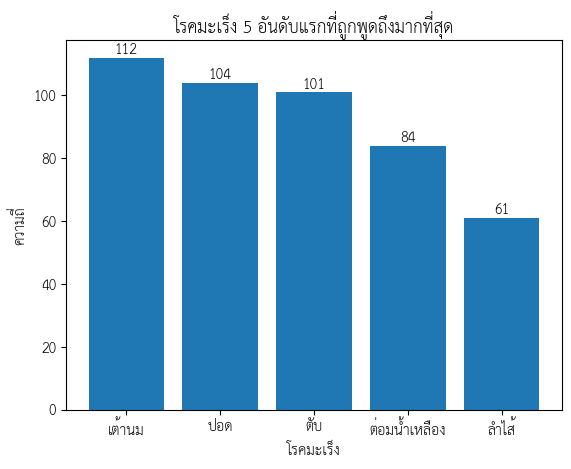

In [27]:

import matplotlib.pyplot as plt

counts = {
    'เต้านม': top_6_words['เต้านม'],
    'ปอด': top_6_words['ปอด'],
    'ตับ': top_6_words['ตับ'],
    'ต่อมน้ำเหลือง': top_6_words['ต่อมน้ำเหลือง'],
    'ลำไส้': top_6_words['ลำไส้']
}

# สร้าง bar chart
plt.bar(counts.keys(), counts.values())
plt.xlabel('โรคมะเร็ง')
plt.ylabel('ความถี่')
plt.title('โรคมะเร็ง 5 อันดับแรกที่ถูกพูดถึงมากที่สุด')

# เพิ่มเลขความถี่ข้างบน bar
for i, v in enumerate(counts.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [28]:
df

,name,comments,ยอดไลค์,จำนวนการตอบกลับ,tokenized_comments,cleaned_comments,cancer
0,ศ.นพ.ชวลิต ศูนย์มะเร็ง รพ.จุฬาลงกรณ์,กดที่ลิงค์นี้เพื่อเข้าไปอ่านคอมเม้นของโพสต์ครั...,456,3,"[กด, ที่, ลิงค์, นี้, เพื่อ, เข้าไป, อ่าน, คอม...","[กด, ลิงค์, เข้าไป, คอม, เม้น, โพสต์, ://www.f...","[กด, ลิงค์, เข้าไป, คอม, เม้น, โพสต์, ://www.f..."
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70,"[เป็น, มะเร็ง, ลำไส้ใหญ่, , ระยะ, ที่, , 3, ...","[มะเร็ง, ลำไส้ใหญ่, 3, อายุ, 26, พฤติกรรม, มีป...","[มะเร็ง, ลำไส้ใหญ่, 26, พฤติกรรม, มีปัญหา, เลื..."
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11,"[แม่, เป็น, มะเร็ง, ขั้ว, ปอด, , ลาม, ขึ้นสมอ...","[แม่, มะเร็ง, ขั้ว, ปอด, ลาม, ขึ้นสมอง, เริ่มแ...","[มะเร็ง, ขั้ว, ปอด, ขึ้นสมอง, หายใจ, สะดวก, เห..."
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44,"[#, มะเร็ง, ปาก, มดลูก, ระยะ, , เกือบ, เข้า, ...","[มะเร็ง, ปาก, มดลูก, 1, อายุ, 30, ., ทุกปี, ผิ...","[มะเร็ง, ปาก, มดลูก, 30, ทุกปี, วันดี, คืน, เด..."
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5,"[ลูกสาว, เป็น, มะเร็ง, กระดูก, , ช่วง, เข่า, ...","[ลูกสาว, มะเร็ง, กระดูก, เข่า, เริ่มแรก, น้อง,...","[ลูกสาว, มะเร็ง, กระดูก, เข่า, น้อง, บ่น, ขา, ..."
...,...,...,...,...,...,...,...
1648,Fear Q'bick,Jitladda Thonglukkeaw มาแชเร้ว ได้บุนนะ,0,0,"[ , , มา, แช, เร้ว, , ได้, บุ, น, นะ]","[แช, เร้ว, บุ, น]","[แช, เร้ว, บุ, น]"
1649,Toei Nittiya,Kamta Auttakan,0,0,[ ],[],[]
1650,Ouiaii Promsuan,อนุชา มีลาภ,0,0,"[อนุชา, , มี, ลาภ]","[อนุชา, ลาภ]","[อนุชา, ลาภ]"
1651,Thanyalak Banboo,Na Nat Fari Kawa II Herbara Binti Abdullah Ras...,0,0,"[ , , , , , , , , , , 'min, ]",['min],['min]


# 5 อันดับ เรื่องโรคมะเร็งที่คน  like มากที่สุด

In [29]:
# prompt: เรียงลำดับจากมากไปน้อย ตามยอดไลค์ top 5

### Code:
like_top_5 = df.sort_values('ยอดไลค์', ascending=False).head(5)
like_top_5


,name,comments,ยอดไลค์,จำนวนการตอบกลับ,tokenized_comments,cleaned_comments,cancer
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44,"[#, มะเร็ง, ปาก, มดลูก, ระยะ, , เกือบ, เข้า, ...","[มะเร็ง, ปาก, มดลูก, 1, อายุ, 30, ., ทุกปี, ผิ...","[มะเร็ง, ปาก, มดลูก, 30, ทุกปี, วันดี, คืน, เด..."
5,Ize Atitya,ลูกสาว 5 ขวบ เป็นมะเร็งสมองคะ ไม่มีอาการอะไร น...,1500,23,"[ลูกสาว, , 5, , ขวบ, , เป็น, มะเร็ง, สมอง, ...","[ลูกสาว, 5, ขวบ, มะเร็ง, สมอง, น้อง, อาเจียน, ...","[ลูกสาว, 5, ขวบ, มะเร็ง, สมอง, น้อง, อาเจียน, ..."
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70,"[เป็น, มะเร็ง, ลำไส้ใหญ่, , ระยะ, ที่, , 3, ...","[มะเร็ง, ลำไส้ใหญ่, 3, อายุ, 26, พฤติกรรม, มีป...","[มะเร็ง, ลำไส้ใหญ่, 26, พฤติกรรม, มีปัญหา, เลื..."
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5,"[ลูกสาว, เป็น, มะเร็ง, กระดูก, , ช่วง, เข่า, ...","[ลูกสาว, มะเร็ง, กระดูก, เข่า, เริ่มแรก, น้อง,...","[ลูกสาว, มะเร็ง, กระดูก, เข่า, น้อง, บ่น, ขา, ..."
46,Neung Lertsak,ผมเป็นมะเร็งเม็ดสีผิวหนังชนิดร้ายแรง(Melanoma)...,477,30,"[ผม, เป็น, มะเร็ง, เม็ด, สี, ผิวหนัง, ชนิด, ร้...","[ผม, มะเร็ง, เม็ด, สี, ผิวหนัง, ชนิด, ร้ายแรง,...","[มะเร็ง, เม็ด, สี, ผิวหนัง, ชนิด, ร้ายแรง, (Me..."


In [30]:
like_top_5

,name,comments,ยอดไลค์,จำนวนการตอบกลับ,tokenized_comments,cleaned_comments,cancer
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44,"[#, มะเร็ง, ปาก, มดลูก, ระยะ, , เกือบ, เข้า, ...","[มะเร็ง, ปาก, มดลูก, 1, อายุ, 30, ., ทุกปี, ผิ...","[มะเร็ง, ปาก, มดลูก, 30, ทุกปี, วันดี, คืน, เด..."
5,Ize Atitya,ลูกสาว 5 ขวบ เป็นมะเร็งสมองคะ ไม่มีอาการอะไร น...,1500,23,"[ลูกสาว, , 5, , ขวบ, , เป็น, มะเร็ง, สมอง, ...","[ลูกสาว, 5, ขวบ, มะเร็ง, สมอง, น้อง, อาเจียน, ...","[ลูกสาว, 5, ขวบ, มะเร็ง, สมอง, น้อง, อาเจียน, ..."
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70,"[เป็น, มะเร็ง, ลำไส้ใหญ่, , ระยะ, ที่, , 3, ...","[มะเร็ง, ลำไส้ใหญ่, 3, อายุ, 26, พฤติกรรม, มีป...","[มะเร็ง, ลำไส้ใหญ่, 26, พฤติกรรม, มีปัญหา, เลื..."
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5,"[ลูกสาว, เป็น, มะเร็ง, กระดูก, , ช่วง, เข่า, ...","[ลูกสาว, มะเร็ง, กระดูก, เข่า, เริ่มแรก, น้อง,...","[ลูกสาว, มะเร็ง, กระดูก, เข่า, น้อง, บ่น, ขา, ..."
46,Neung Lertsak,ผมเป็นมะเร็งเม็ดสีผิวหนังชนิดร้ายแรง(Melanoma)...,477,30,"[ผม, เป็น, มะเร็ง, เม็ด, สี, ผิวหนัง, ชนิด, ร้...","[ผม, มะเร็ง, เม็ด, สี, ผิวหนัง, ชนิด, ร้ายแรง,...","[มะเร็ง, เม็ด, สี, ผิวหนัง, ชนิด, ร้ายแรง, (Me..."


In [31]:
for index, row in like_top_5.iterrows():
    cancer_words = row['cancer']
    if 'มะเร็ง' in cancer_words:
        index_of_cancer = cancer_words.index('มะเร็ง')
        # ดึงคำหลังจาก 'มะเร็ง' และจำนวนคำที่ต้องการคือ 2 คำ
        words_after_cancer = cancer_words[index_of_cancer + 1 : index_of_cancer + 4]  # เพิ่มช่วงคำที่ตรวจสอบ
        extracted_phrase = ''.join(words_after_cancer)

        # ตรวจสอบว่าข้อความตรงกับรายการที่เราสนใจหรือไม่
        for phrase in ['ปากมดลูก', 'สมอง', 'ลำไส้ใหญ่', 'กระดูก', 'เม็ดสีผิวหนัง']:
            if phrase in extracted_phrase:
                print(f"Comment {index} (Likes: {row['ยอดไลค์']}): มะเร็ง{phrase}")
                break  # หยุดการวนลูปหลังจากพิมพ์แล้ว
    else:
        print(f"Comment {index} (Likes: {row['ยอดไลค์']}): ไม่พบคำว่า 'มะเร็ง'")


Comment 3 (Likes: 1600): มะเร็งปากมดลูก
Comment 5 (Likes: 1500): มะเร็งสมอง
Comment 1 (Likes: 1400): มะเร็งลำไส้ใหญ่
Comment 4 (Likes: 480): มะเร็งกระดูก
Comment 46 (Likes: 477): มะเร็งเม็ดสีผิวหนัง


In [32]:
df

,name,comments,ยอดไลค์,จำนวนการตอบกลับ,tokenized_comments,cleaned_comments,cancer
0,ศ.นพ.ชวลิต ศูนย์มะเร็ง รพ.จุฬาลงกรณ์,กดที่ลิงค์นี้เพื่อเข้าไปอ่านคอมเม้นของโพสต์ครั...,456,3,"[กด, ที่, ลิงค์, นี้, เพื่อ, เข้าไป, อ่าน, คอม...","[กด, ลิงค์, เข้าไป, คอม, เม้น, โพสต์, ://www.f...","[กด, ลิงค์, เข้าไป, คอม, เม้น, โพสต์, ://www.f..."
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70,"[เป็น, มะเร็ง, ลำไส้ใหญ่, , ระยะ, ที่, , 3, ...","[มะเร็ง, ลำไส้ใหญ่, 3, อายุ, 26, พฤติกรรม, มีป...","[มะเร็ง, ลำไส้ใหญ่, 26, พฤติกรรม, มีปัญหา, เลื..."
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11,"[แม่, เป็น, มะเร็ง, ขั้ว, ปอด, , ลาม, ขึ้นสมอ...","[แม่, มะเร็ง, ขั้ว, ปอด, ลาม, ขึ้นสมอง, เริ่มแ...","[มะเร็ง, ขั้ว, ปอด, ขึ้นสมอง, หายใจ, สะดวก, เห..."
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44,"[#, มะเร็ง, ปาก, มดลูก, ระยะ, , เกือบ, เข้า, ...","[มะเร็ง, ปาก, มดลูก, 1, อายุ, 30, ., ทุกปี, ผิ...","[มะเร็ง, ปาก, มดลูก, 30, ทุกปี, วันดี, คืน, เด..."
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5,"[ลูกสาว, เป็น, มะเร็ง, กระดูก, , ช่วง, เข่า, ...","[ลูกสาว, มะเร็ง, กระดูก, เข่า, เริ่มแรก, น้อง,...","[ลูกสาว, มะเร็ง, กระดูก, เข่า, น้อง, บ่น, ขา, ..."
...,...,...,...,...,...,...,...
1648,Fear Q'bick,Jitladda Thonglukkeaw มาแชเร้ว ได้บุนนะ,0,0,"[ , , มา, แช, เร้ว, , ได้, บุ, น, นะ]","[แช, เร้ว, บุ, น]","[แช, เร้ว, บุ, น]"
1649,Toei Nittiya,Kamta Auttakan,0,0,[ ],[],[]
1650,Ouiaii Promsuan,อนุชา มีลาภ,0,0,"[อนุชา, , มี, ลาภ]","[อนุชา, ลาภ]","[อนุชา, ลาภ]"
1651,Thanyalak Banboo,Na Nat Fari Kawa II Herbara Binti Abdullah Ras...,0,0,"[ , , , , , , , , , , 'min, ]",['min],['min]


# 5 อันดับมะเร็งที่คนตอบกลับมากที่สุด

In [33]:
reply_top_5 = df.sort_values('จำนวนการตอบกลับ', ascending=False).head(10)
reply_top_5

,name,comments,ยอดไลค์,จำนวนการตอบกลับ,tokenized_comments,cleaned_comments,cancer
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70,"[เป็น, มะเร็ง, ลำไส้ใหญ่, , ระยะ, ที่, , 3, ...","[มะเร็ง, ลำไส้ใหญ่, 3, อายุ, 26, พฤติกรรม, มีป...","[มะเร็ง, ลำไส้ใหญ่, 26, พฤติกรรม, มีปัญหา, เลื..."
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44,"[#, มะเร็ง, ปาก, มดลูก, ระยะ, , เกือบ, เข้า, ...","[มะเร็ง, ปาก, มดลูก, 1, อายุ, 30, ., ทุกปี, ผิ...","[มะเร็ง, ปาก, มดลูก, 30, ทุกปี, วันดี, คืน, เด..."
22,รมิตา ผู้หญิงที่เป็นของขวัญ,สำหรับมะเร็งปากมดลูก แนะนำให้ตรวจภายในเป็นประจ...,102,31,"[สำหรับ, มะเร็ง, ปาก, มดลูก, , แนะนำ, ให้, ตร...","[สำหรับ, มะเร็ง, ปาก, มดลูก, แนะนำ, เป็นประจำ,...","[สำหรับ, มะเร็ง, ปาก, มดลูก, แนะนำ, เป็นประจำ,..."
46,Neung Lertsak,ผมเป็นมะเร็งเม็ดสีผิวหนังชนิดร้ายแรง(Melanoma)...,477,30,"[ผม, เป็น, มะเร็ง, เม็ด, สี, ผิวหนัง, ชนิด, ร้...","[ผม, มะเร็ง, เม็ด, สี, ผิวหนัง, ชนิด, ร้ายแรง,...","[มะเร็ง, เม็ด, สี, ผิวหนัง, ชนิด, ร้ายแรง, (Me..."
113,Phacharatorn Subsiritavee,ผมเป็นมะเร็งลำไส้ใหญ่ระยะที่ 3 (ปัจจุบันรักษาห...,33,28,"[ผม, เป็น, มะเร็ง, ลำไส้ใหญ่, ระยะ, ที่, , 3,...","[ผม, มะเร็ง, ลำไส้ใหญ่, 3]","[มะเร็ง, ลำไส้ใหญ่]"
92,Voravit Kanpai,อายุ39ปีเป็นมะเร็งลำไส้ครับ แรกๆอาการคล้ายโรคก...,116,27,"[อายุ, 39, ปี, เป็น, มะเร็ง, ลำไส้, ครับ, , แ...","[อายุ, 39, มะเร็ง, ลำไส้, โรคกระเพาะ, ปกติ, น้...","[39, มะเร็ง, ลำไส้, โรคกระเพาะ, น้ำหนัก, ลด, เ..."
10,นู๋นิด ขนิษฐา,ขอให้เรื่องราวของพ่อกับพี่ชายเราเป็นวิทยาทานแก...,353,25,"[ขอให้, เรื่องราว, ของ, พ่อ, กับ, พี่ชาย, เรา,...","[ขอให้, เรื่องราว, พ่อ, พี่ชาย, วิทยาทาน, พ่อ,...","[ขอให้, เรื่องราว, พี่ชาย, วิทยาทาน, มะเร็ง, ต..."
5,Ize Atitya,ลูกสาว 5 ขวบ เป็นมะเร็งสมองคะ ไม่มีอาการอะไร น...,1500,23,"[ลูกสาว, , 5, , ขวบ, , เป็น, มะเร็ง, สมอง, ...","[ลูกสาว, 5, ขวบ, มะเร็ง, สมอง, น้อง, อาเจียน, ...","[ลูกสาว, 5, ขวบ, มะเร็ง, สมอง, น้อง, อาเจียน, ..."
13,Nareerat Waawaaw Singtong,คุณพ่อเปนมะเรงตับอ่อน+ท่อน้ำดี ไม่มีอาการอะไรเ...,291,21,"[คุณพ่อ, เป, นมะ, เร, ง, ตับอ่อน, +, ท่อ, น้ำด...","[คุณพ่อ, เป, นมะ, เร, ง, ตับอ่อน, +, ท่อ, น้ำด...","[เป, นมะ, เร, ง, ตับอ่อน, +, ท่อ, น้ำดี, คัน, ..."
30,องุ่น รสสุคนธ์,คุณพ่อเป็นมะเร็งตับ ก่อนหน้านี้เวลากินอาหารจะช...,165,19,"[คุณพ่อ, เป็น, มะเร็ง, ตับ, , ก่อนหน้านี้, เว...","[คุณพ่อ, มะเร็ง, ตับ, เวลา, อาหาร, ชอบ, บ่นว่า...","[มะเร็ง, ตับ, เวลา, บ่นว่า, จุกเสียด, เข้าไป, ..."


In [34]:
for index, row in reply_top_5.iterrows():
    cancer_words = row['cancer']
    if 'มะเร็ง' in cancer_words:
        index_of_cancer = cancer_words.index('มะเร็ง')
        # ดึงคำหลังจาก 'มะเร็ง' และจำนวนคำที่ต้องการคือ 2 คำ
        words_after_cancer = cancer_words[index_of_cancer + 1 : index_of_cancer + 4]  # เพิ่มช่วงคำที่ตรวจสอบ
        extracted_phrase = ''.join(words_after_cancer)

        # ตรวจสอบว่าข้อความตรงกับรายการที่เราสนใจหรือไม่
        for phrase in ['ปากมดลูก', 'สมอง', 'ลำไส้ใหญ่', 'กระดูก', 'เม็ดสีผิวหนัง', 'ลำไส้', ',ตับ']:
            if phrase in extracted_phrase:
                print(f"Comment {index} (reply: {row['จำนวนการตอบกลับ']}): มะเร็ง{phrase}")
                break  # หยุดการวนลูปหลังจากพิมพ์แล้ว
    else:
        print(f"Comment {index} (reply: {row['จำนวนการตอบกลับ']}): ไม่พบคำว่า 'มะเร็ง'")


Comment 1 (reply: 70): มะเร็งลำไส้ใหญ่
Comment 3 (reply: 44): มะเร็งปากมดลูก
Comment 22 (reply: 31): มะเร็งปากมดลูก
Comment 46 (reply: 30): มะเร็งเม็ดสีผิวหนัง
Comment 113 (reply: 28): มะเร็งลำไส้ใหญ่
Comment 92 (reply: 27): มะเร็งลำไส้
Comment 5 (reply: 23): มะเร็งสมอง
Comment 13 (reply: 21): ไม่พบคำว่า 'มะเร็ง'


In [35]:
from collections import Counter

# เก็บจำนวนการเกิดของแต่ละโรคและจำนวน reply ใน Dictionary
disease_counter = Counter()
reply_counter = Counter()

for index, row in reply_top_5.iterrows():
    cancer_words = row['cancer']
    if 'มะเร็ง' in cancer_words:
        index_of_cancer = cancer_words.index('มะเร็ง')
        words_after_cancer = cancer_words[index_of_cancer + 1 : index_of_cancer + 4]
        extracted_phrase = ''.join(words_after_cancer)

        # ตรวจสอบโรคแล้วเพิ่มในตัวนับ
        for phrase in ['ปากมดลูก', 'สมอง', 'ลำไส้ใหญ่', 'กระดูก', 'เม็ดสีผิวหนัง', 'ลำไส้', ',ตับ']:
            if phrase in extracted_phrase:
                disease_counter[phrase] += 1
                reply_counter[phrase] += row['จำนวนการตอบกลับ']
                break

# แสดงผล 5 อันดับแรก
top_5_diseases = disease_counter.most_common(5)
for i, (disease, count) in enumerate(top_5_diseases, start=1):
    total_replies = reply_counter[disease]
    print(f"อันดับ {i}: มะเร็ง{disease} - {count} ครั้ง, ตอบกลับทั้งหมด {total_replies} ครั้ง")


อันดับ 1: มะเร็งลำไส้ใหญ่ - 2 ครั้ง, ตอบกลับทั้งหมด 98 ครั้ง
อันดับ 2: มะเร็งปากมดลูก - 2 ครั้ง, ตอบกลับทั้งหมด 75 ครั้ง
อันดับ 3: มะเร็งเม็ดสีผิวหนัง - 1 ครั้ง, ตอบกลับทั้งหมด 30 ครั้ง
อันดับ 4: มะเร็งลำไส้ - 1 ครั้ง, ตอบกลับทั้งหมด 27 ครั้ง
อันดับ 5: มะเร็งสมอง - 1 ครั้ง, ตอบกลับทั้งหมด 23 ครั้ง


In [ ]:
จากจำนวนคอมเมนที่มากที่สุด 10 อันดับแรก โรคที่มีจำนวนการตอบกลับมากที่สุด 5 อันดับแรกคือ..............